In [ ]:
from google.colab import files
uploaded = files.upload()  # Select your images (image1.jpg, image2.jpg)


In [1]:
# SURF & SIFT Feature Detection in Colab
!pip install --quiet opencv-contrib-python matplotlib

In [2]:
import cv2
import time
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

In [3]:
# --- Upload Images ---
print("Upload your images (e.g., image1.jpg, image2.jpg)")
uploaded = files.upload()

Upload your images (e.g., image1.jpg, image2.jpg)


Saving butterfly.jpg to butterfly.jpg
Saving HappyFish.jpg to HappyFish.jpg


In [4]:
# Get file names
file_names = list(uploaded.keys())
if len(file_names) < 2:
    raise Exception("Please upload at least two images.")

img1_path = file_names[0]
img2_path = file_names[1]


In [5]:
# --- Load Images ---
def load_image(path):
    img = cv2.imdecode(np.frombuffer(uploaded[path], np.uint8), cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Image {path} not found or cannot be read.")
    return img

img1 = load_image(img1_path)
img2 = load_image(img2_path)

In [10]:
# --- Feature Detection Function ---
def detect_features(img, method='ORB'):
    if method == 'ORB':
        detector = cv2.ORB_create(nfeatures=1000)
    elif method == 'SIFT':
        detector = cv2.SIFT_create()
    else:
        raise ValueError("Method must be 'ORB' or 'SIFT'")

    start = time.time()
    keypoints, descriptors = detector.detectAndCompute(img, None)
    elapsed = time.time() - start
    return keypoints, descriptors, elapsed

In [11]:
# --- Feature Matching Function ---
def match_features(desc1, desc2, method='ORB'):
    # Use Hamming for ORB (binary), L2 for SIFT
    if method == 'ORB':
        matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    else:
        matcher = cv2.BFMatcher()
    matches = matcher.match(desc1, desc2)
    matches = sorted(matches, key=lambda x: x.distance)
    return matches

In [12]:
# --- Visualization Function ---
def visualize_keypoints(img, keypoints, title='Keypoints'):
    img_kp = cv2.drawKeypoints(img, keypoints, None, (255,0,0), 4)
    plt.figure(figsize=(8,6))
    plt.imshow(img_kp, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def visualize_matches(img1, kp1, img2, kp2, matches, title='Matches'):
    img_match = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)
    plt.figure(figsize=(12,6))
    plt.imshow(img_match)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [13]:
# --- Detect Features ---
kp1_orb, des1_orb, t1_orb = detect_features(img1, 'ORB')
kp2_orb, des2_orb, t2_orb = detect_features(img2, 'ORB')

kp1_sift, des1_sift, t1_sift = detect_features(img1, 'SIFT')
kp2_sift, des2_sift, t2_sift = detect_features(img2, 'SIFT')


In [14]:
# --- Match Features ---
matches_orb = match_features(des1_orb, des2_orb, 'ORB')
matches_sift = match_features(des1_sift, des2_sift, 'SIFT')


In [15]:
# --- Display Metrics ---
print("=== ORB Metrics ===")
print(f"Image1 keypoints: {len(kp1_orb)}, Image2 keypoints: {len(kp2_orb)}")
print(f"Descriptor computation time: Image1 {t1_orb:.4f}s, Image2 {t2_orb:.4f}s")
print(f"Good matches: {len(matches_orb)}\n")

print("=== SIFT Metrics ===")
print(f"Image1 keypoints: {len(kp1_sift)}, Image2 keypoints: {len(kp2_sift)}")
print(f"Descriptor computation time: Image1 {t1_sift:.4f}s, Image2 {t2_sift:.4f}s")
print(f"Good matches: {len(matches_sift)}\n")

=== ORB Metrics ===
Image1 keypoints: 1000, Image2 keypoints: 552
Descriptor computation time: Image1 0.0544s, Image2 0.0032s
Good matches: 132

=== SIFT Metrics ===
Image1 keypoints: 1078, Image2 keypoints: 43
Descriptor computation time: Image1 0.1216s, Image2 0.0101s
Good matches: 1078



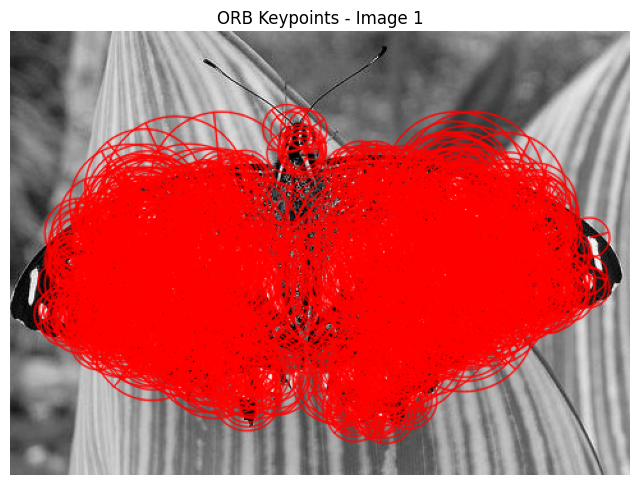

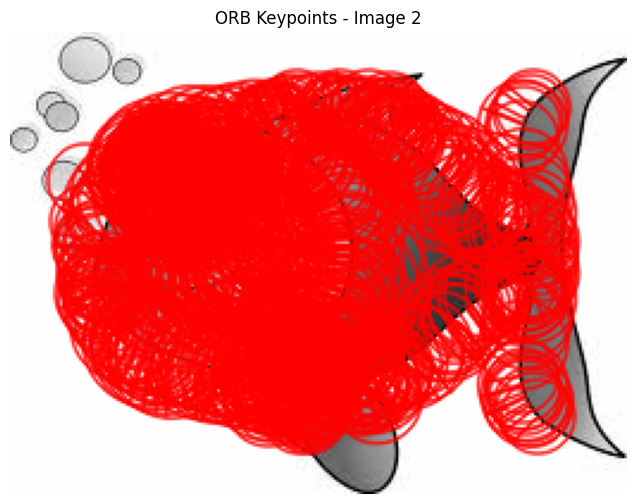

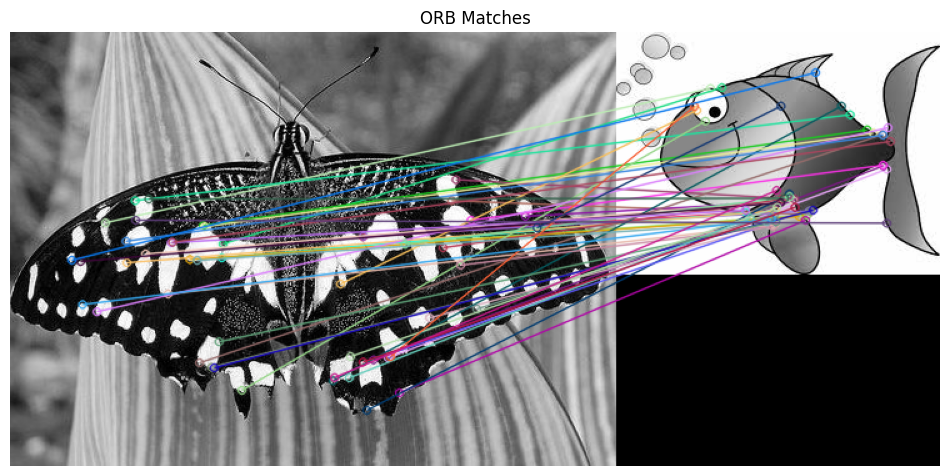

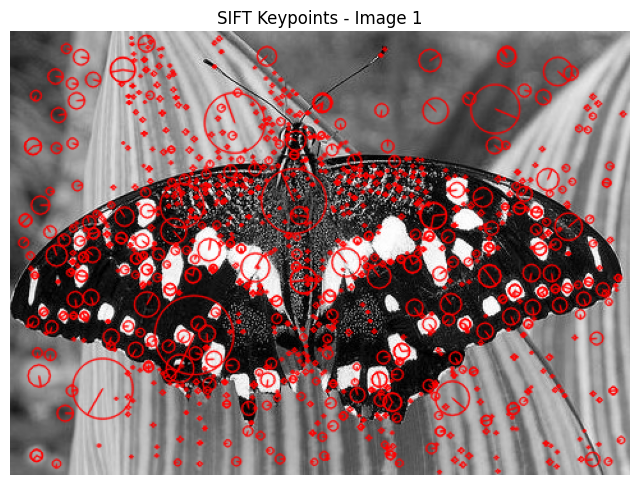

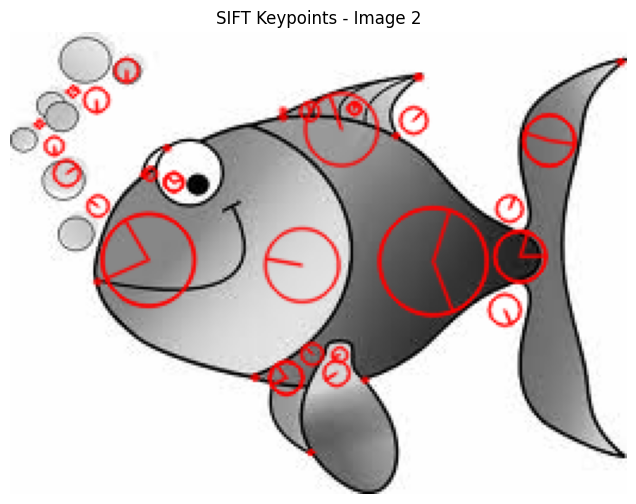

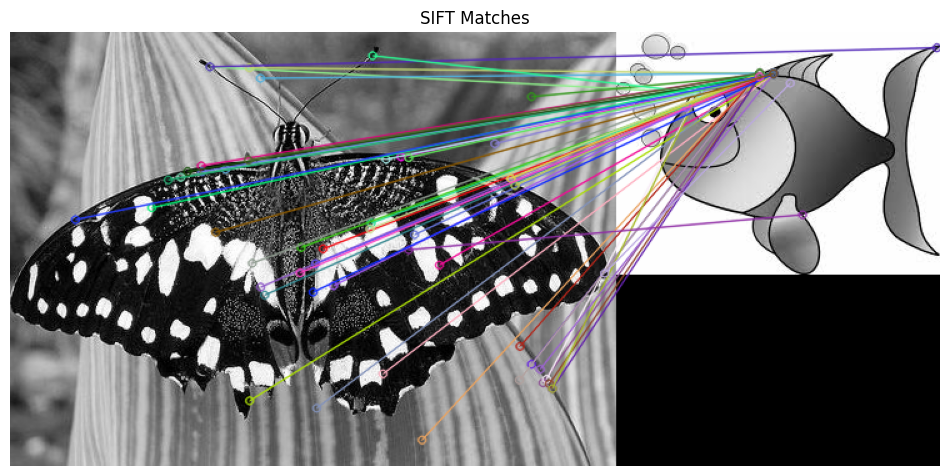

In [16]:
# --- Visualizations ---
visualize_keypoints(img1, kp1_orb, 'ORB Keypoints - Image 1')
visualize_keypoints(img2, kp2_orb, 'ORB Keypoints - Image 2')
visualize_matches(img1, kp1_orb, img2, kp2_orb, matches_orb, 'ORB Matches')

visualize_keypoints(img1, kp1_sift, 'SIFT Keypoints - Image 1')
visualize_keypoints(img2, kp2_sift, 'SIFT Keypoints - Image 2')
visualize_matches(img1, kp1_sift, img2, kp2_sift, matches_sift, 'SIFT Matches')